In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
# adjust the power limits as needed
formatter.set_powerlimits((-1, 1))  # Adjust the limits as needed

In [2]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_noise_doe_experiments_input.csv", index_col=0)
output = pd.read_csv("exp_noise_doe_experiments_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

In [3]:
mf_rbf_gpr_results["ck_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["ck_learned_noise_std"]-0.3)
mf_rbf_gpr_results["mkg_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["mkg_learned_noise_std"]-0.3)
mf_rbf_gpr_results["hk_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["hk_learned_noise_std"]-0.3)
mf_rbf_gpr_results["sk_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["sk_learned_noise_std"]-0.3)

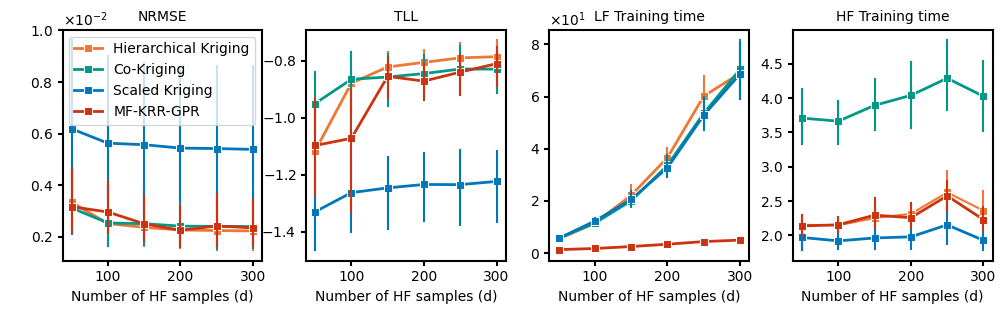

In [8]:
# show 1 example for the main text
font_size = 10
problems = mf_rbf_gpr_results["problem"].unique()
# problem information
problem_sets = [
    "Bohachevsky",
    "Forrester",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 1,  2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.730,  0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i, problem in enumerate(problems):
    if problem == "mf_Booth":
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_normalized_rmse",
            ax=ax[0],
            linewidth=2,
            color='#EE7733',
            marker="s",
            label="Hierarchical Kriging",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_normalized_rmse",
            ax=ax[0],
            linewidth=2,
            color='#009988',
            marker="s",
            label="Co-Kriging",
            err_style="bars",
        )

        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_normalized_rmse",
            linewidth=2,
            color='#0077BB',
            err_style="bars",
            marker="s",
            ax=ax[0],
            label="Scaled Kriging",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_normalized_rmse",
            err_style="bars",
            linewidth=2,
            color='#CC3311',
            marker="s",
            ax=ax[0],
            label="MF-KRR-GPR",
        )
        # set the legend on the top right
        ax[0].legend(loc="upper right", fontsize=10)
        ax[0].set_ylabel(" ", fontsize=font_size)
        # plot for the log likelihood
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_mean_log_likelihood",
            marker="s",
            legend="full",
            linewidth=2,
            color='#EE7733',
            ax=ax[1],
            label="hk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_mean_log_likelihood",
            marker="s",
            legend="full",
            ax=ax[1],
            label="cokriging",
            linewidth=2,
            color='#009988',
            err_style="bars",
        )

        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_mean_log_likelihood",
            marker="s",
            legend="full",
            linewidth=2,
            color='#0077BB',
            ax=ax[1],
            label="sk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_mean_log_likelihood",
            marker="s",
            legend="full",
            linewidth=2,
            color='#CC3311',
            ax=ax[1],
            label="mf_krr_gpr",
            err_style="bars",
        )
        ax[1].legend().set_visible(False)
        ax[1].set_ylabel(" ", fontsize=font_size)
        # set tile for the plot
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_lf_training_time",
            linewidth=2,
            color='#EE7733',
            linestyle="-",
            marker="s",
            legend="full",
            ax=ax[2],
            label="hk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_hf_training_time",
            marker="s",
            legend="full",
            linestyle="-",
            color='#EE7733',
            ax=ax[3],
            label="hk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_lf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#009988',
            ax=ax[2],
            label="cokriging",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_hf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#009988',
            linestyle="-",
            ax=ax[3],
            label="cokriging",
            err_style="bars",
        )

        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_lf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#0077BB',
            linestyle="-",
            ax=ax[2],
            label="sk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_hf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#0077BB',
            linestyle="-",
            ax=ax[3],
            label="sk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_lf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#CC3311',
            ax=ax[2],
            label="mf_krr_gpr",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_hf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#CC3311',
            linestyle="-",
            ax=ax[3],
            label="mf_krr_gpr",
            err_style="bars",
        )
        ax[2].legend().set_visible(False)
        ax[2].set_ylabel(" ", fontsize=font_size)
        ax[3].legend().set_visible(False)
        ax[3].set_ylabel(" ", fontsize=font_size)
        # set scientific notation for the y-axis
        ax[0].yaxis.set_major_formatter(formatter)

# set the linewidth of axis
for i in range(4):
    # ax[i].yaxis.set_major_formatter(formatter)
    ax[i].ticklabel_format(axis='y', style='sci', scilimits=(-1, 1),
                           useMathText=True, useLocale=True)
    ax[i].spines["top"].set_linewidth(1.5)
    ax[i].spines["right"].set_linewidth(1.5)
    ax[i].spines["left"].set_linewidth(1.5)
    ax[i].spines["bottom"].set_linewidth(1.5)
    ax[i].tick_params(width=1.5)
    ax[i].set_xlabel("Number of HF samples (d)", fontsize=font_size)
    # set font size of the axis
    ax[i].tick_params(axis="both", labelsize=font_size)
    # set the font size of all axis
    ax[i].title.set_fontsize(font_size)
    ax[i].title.set_color("black")
ax[0].set_title("NRMSE", fontsize=font_size)
ax[1].set_title("TLL", fontsize=font_size)
ax[2].set_title("LF Training time", fontsize=font_size)
ax[3].set_title("HF Training time", fontsize=font_size)

# set the space between the subplots
plt.subplots_adjust(wspace=0.22)
plt.savefig("gpr_comparison_at_20hf_samples_main_text.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_20hf_samples_main_text.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_20hf_samples_main_text.svg",
            dpi=300, bbox_inches="tight")

plt.show()

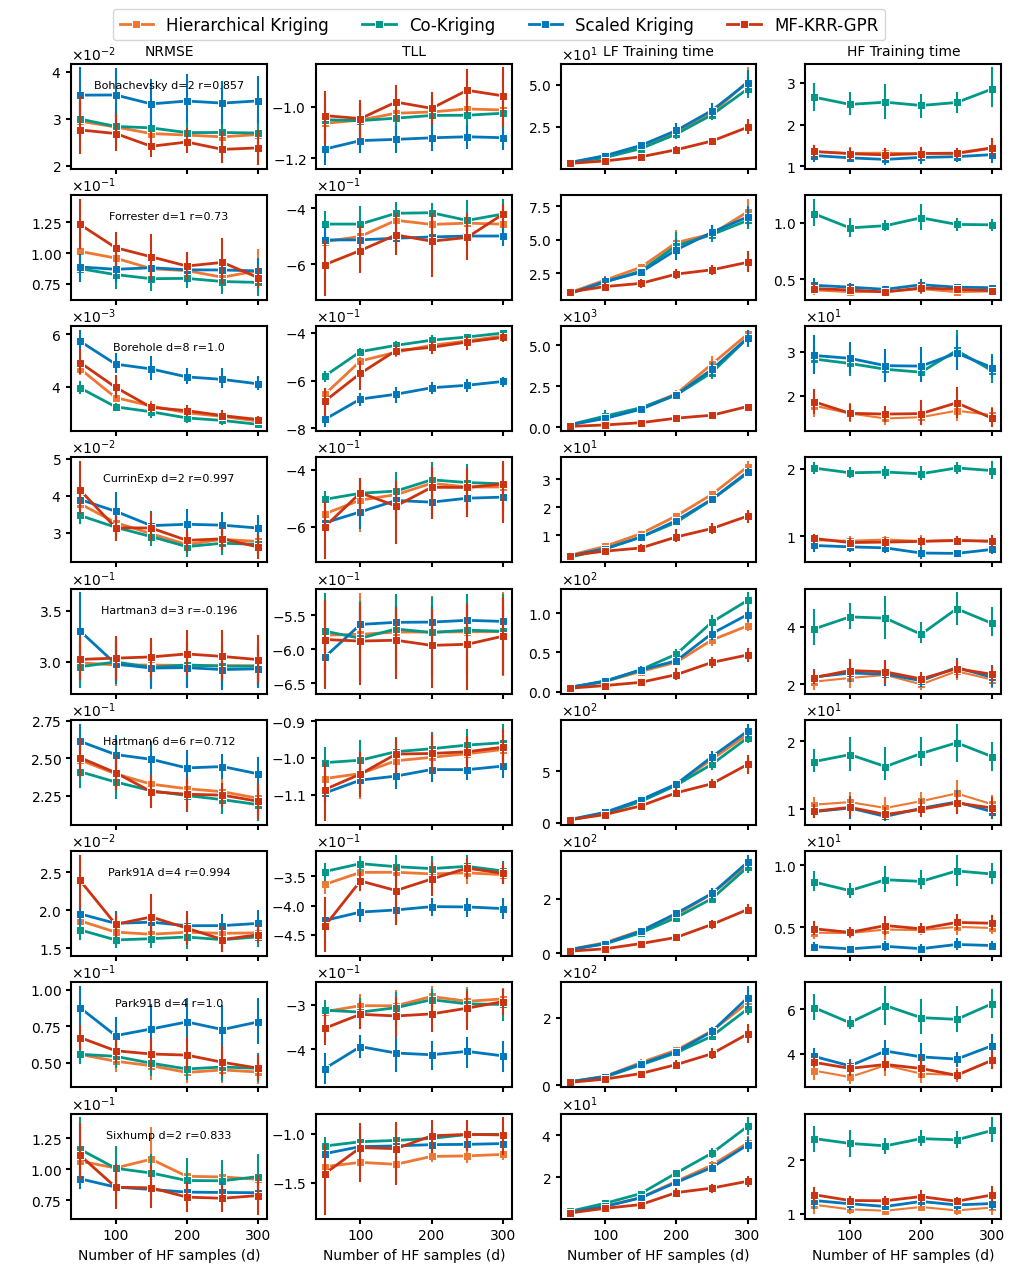

In [10]:
from matplotlib.ticker import ScalarFormatter

font_size = 10
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
# adjust the power limits as needed
formatter.set_powerlimits((-5, 5))  # Adjust the limits as needed
problems = mf_rbf_gpr_results["problem"].unique()
# problem information
problem_sets = [
    "Bohachevsky",
    "Forrester",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 1,  2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.730,  0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]
ii = 0
fig, ax = plt.subplots(9, 4, figsize=(12, 15))
for i, problem in enumerate(problems):
    if problem != "mf_Booth":
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_normalized_rmse",
            ax=ax[ii, 0],
            linewidth=2,
            color='#EE7733',
            marker="s",
            label="Hierarchical Kriging",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_normalized_rmse",
            ax=ax[ii, 0],
            linewidth=2,
            color='#009988',
            marker="s",
            label="Co-Kriging",
            err_style="bars",
        )

        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_normalized_rmse",
            linewidth=2,
            color='#0077BB',
            err_style="bars",
            marker="s",
            ax=ax[ii, 0],
            label="Scaled Kriging",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_normalized_rmse",
            err_style="bars",
            linewidth=2,
            color='#CC3311',
            marker="s",
            ax=ax[ii, 0],
            label="MF-KRR-GPR",
        )
        # set the legend on the top right
        ax[ii, 0].legend().set_visible(False)
        ax[ii, 0].set_ylabel(" ", fontsize=font_size)
        # plot for the log likelihood
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_mean_log_likelihood",
            marker="s",
            legend="full",
            linewidth=2,
            color='#EE7733',
            ax=ax[ii, 1],
            label="hk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_mean_log_likelihood",
            marker="s",
            legend="full",
            ax=ax[ii, 1],
            label="cokriging",
            linewidth=2,
            color='#009988',
            err_style="bars",
        )

        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_mean_log_likelihood",
            marker="s",
            legend="full",
            linewidth=2,
            color='#0077BB',
            ax=ax[ii, 1],
            label="sk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_mean_log_likelihood",
            marker="s",
            legend="full",
            linewidth=2,
            color='#CC3311',
            ax=ax[ii, 1],
            label="mf_krr_gpr",
            err_style="bars",
        )
        ax[ii, 1].legend().set_visible(False)
        ax[ii, 1].set_ylabel(" ", fontsize=font_size)
        # set tile for the plot
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_lf_training_time",
            linewidth=2,
            color='#EE7733',
            linestyle="-",
            marker="s",
            legend="full",
            ax=ax[ii, 2],
            label="hk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="hk_hf_training_time",
            marker="s",
            legend="full",
            linestyle="-",
            color='#EE7733',
            ax=ax[ii, 3],
            label="hk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_lf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#009988',
            ax=ax[ii, 2],
            label="cokriging",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="ck_hf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#009988',
            linestyle="-",
            ax=ax[ii, 3],
            label="cokriging",
            err_style="bars",
        )

        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_lf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#0077BB',
            linestyle="-",
            ax=ax[ii, 2],
            label="sk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="sk_hf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#0077BB',
            linestyle="-",
            ax=ax[ii, 3],
            label="sk",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_lf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#CC3311',
            ax=ax[ii, 2],
            label="mf_krr_gpr",
            err_style="bars",
        )
        sns.lineplot(
            data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
            x="num_lf",
            y="mkg_hf_training_time",
            marker="s",
            legend="full",
            linewidth=2,
            color='#CC3311',
            linestyle="-",
            ax=ax[ii, 3],
            label="mf_krr_gpr",
            err_style="bars",
        )
        ax[ii, 2].legend().set_visible(False)
        ax[ii, 2].set_ylabel(" ", fontsize=font_size)
        ax[ii, 3].legend().set_visible(False)
        ax[ii, 3].set_ylabel(" ", fontsize=font_size)
        # set the title for the plot without bold
        # ax[ii, 2].set_title(
        #     f"{problem_sets[i]}, d={dimensions[i]}, r={r2[i]}", fontsize=font_size)
        # set text in the plot in the middle
        ax[ii, 0].text(0.5, 0.8, f"{problem_sets[i]} d={dimensions[i]} r={r2[i]}", horizontalalignment='center',
                       verticalalignment='center', transform=ax[ii, 0].transAxes, fontsize=8)
        ii = ii + 1

# set the linewidth of axis
for i in range(9):
    for j in range(4):
        # set format for the y axis into scientific notation for subplots
        # get the y-axis values of the plot
        ax[i, j].ticklabel_format(axis='y', style='sci', scilimits=(-1, 1),
                                  useMathText=True, useLocale=True)
        ax[i, j].spines["top"].set_linewidth(1.5)
        ax[i, j].spines["right"].set_linewidth(1.5)
        ax[i, j].spines["left"].set_linewidth(1.5)
        ax[i, j].spines["bottom"].set_linewidth(1.5)
        ax[i, j].tick_params(width=1.5)
        if i == 8:
            ax[i, j].set_xlabel("Number of HF samples (d)", fontsize=font_size)
        else:
            ax[i, j].set_xlabel(" ")
        # set font size of the axis
        ax[i, j].tick_params(axis="both", labelsize=font_size)
        # set the font size of all axis
        ax[i, j].title.set_fontsize(font_size)
        ax[i, j].title.set_color("black")

# remove the x axis values for all plot except the last one
for i in range(8):
    for j in range(4):
        ax[i, j].set_xticklabels([])
# set title for first row
ax[0, 0].set_title("NRMSE", fontsize=font_size)
ax[0, 1].set_title("TLL", fontsize=font_size)
ax[0, 2].set_title("LF Training time", fontsize=font_size)
ax[0, 3].set_title("HF Training time", fontsize=font_size)
# add legend for ax[0, 2]
# ax[0, 2].legend(loc="upper left", fontsize=12)
# ax[0, 2].legend(["LF", "HF"], loc="upper left", fontsize=12)
# add legend for ax[0, 0] and put it at the very top right
ax[0, 0].legend(loc="upper right", fontsize=12, ncol=4,
                bbox_to_anchor=(4.2, 1.6))

# set the space between the subplots
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.savefig("gpr_comparison_at_20hf_samples_appendix.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_20hf_samples_appendix.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_20hf_samples_appendix.svg",
            dpi=300, bbox_inches="tight")
plt.show()